In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [4]:
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nDescriptive statistics:")
print(df.describe())

Dataset shape: (2823, 25)

First few rows:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1  

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())

df['ADDRESSLINE2'].fillna('', inplace=True)
df['STATE'].fillna('Unknown', inplace=True)
df['POSTALCODE'].fillna('Unknown', inplace=True)


Missing values per column:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


C:\Users\SRezk\AppData\Local\Temp\ipykernel_12856\1066359190.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ADDRESSLINE2'].fillna('', inplace=True)
C:\Users\SRezk\AppData\Local\Temp\ipykernel_12856\1066359190.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [ ]:
print("\nChecking for negative values:")
print((df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']] < 0).sum())

df['CALCULATED_SALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']
discrepancy = df[abs(df['SALES'] - df['CALCULATED_SALES']) > 1]
print(f"\nRows with sales calculation discrepancy: {len(discrepancy)}")
if len(discrepancy) > 0:
    print(discrepancy[['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'CALCULATED_SALES']].head())


Checking for negative values:
QUANTITYORDERED    0
PRICEEACH          0
SALES              0
dtype: int64

Rows with sales calculation discrepancy: 1303
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH    SALES  CALCULATED_SALES
4         10159               49      100.0  5205.27            4900.0
7         10188               48      100.0  5512.32            4800.0
9         10211               41      100.0  4708.44            4100.0
10        10223               37      100.0  3965.66            3700.0
11        10237               23      100.0  2333.12            2300.0


In [6]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [7]:
df['ORDER_YEAR'] = df['ORDERDATE'].dt.year
df['ORDER_MONTH'] = df['ORDERDATE'].dt.month
df['ORDER_DAY'] = df['ORDERDATE'].dt.day
df['ORDER_DAYOFWEEK'] = df['ORDERDATE'].dt.dayofweek  # Monday=0, Sunday=6

In [8]:
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [9]:
cat_cols = ['STATUS', 'PRODUCTLINE', 'COUNTRY', 'TERRITORY', 'DEALSIZE']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [10]:
df['TOTAL_COST'] = df['QUANTITYORDERED'] * df['PRICEEACH']
df['PROFIT_MARGIN'] = (df['SALES'] - df['TOTAL_COST']) / df['SALES']

In [ ]:
df['ORDER_QUARTER'] = df['ORDERDATE'].dt.quarter
df['IS_HOLIDAY_SEASON'] = df['ORDER_MONTH'].isin([11, 12]).astype(int)  # Nov-Dec

df['DAYS_SINCE_LAST_ORDER'] = df.groupby('CUSTOMERNAME')['ORDERDATE'].diff().dt.days
df['ORDER_FREQUENCY'] = df.groupby('CUSTOMERNAME')['ORDERNUMBER'].transform('count')

print("\nAdded features:")
print(df[['ORDER_QUARTER', 'IS_HOLIDAY_SEASON', 'DAYS_SINCE_LAST_ORDER', 'ORDER_FREQUENCY']].head())


Added features:
   ORDER_QUARTER  IS_HOLIDAY_SEASON  DAYS_SINCE_LAST_ORDER  ORDER_FREQUENCY
0              1                  0                    NaN               49
1              2                  0                    NaN               41
2              3                  0                    NaN               20
3              3                  0                    NaN               30
4              4                  0                    NaN               41


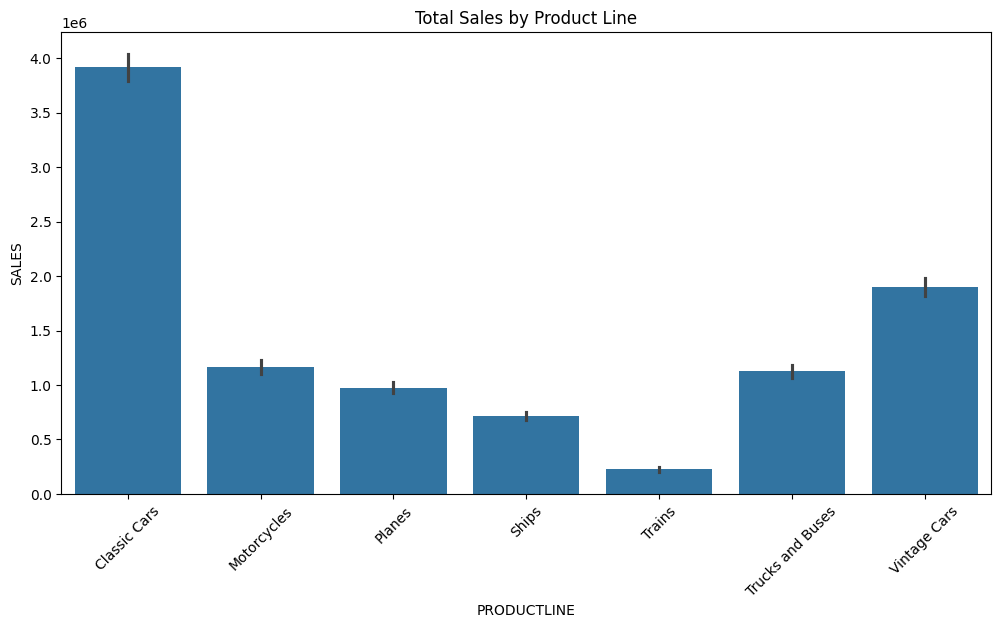

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PRODUCTLINE', y='SALES', data=df, estimator=sum)
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.show()

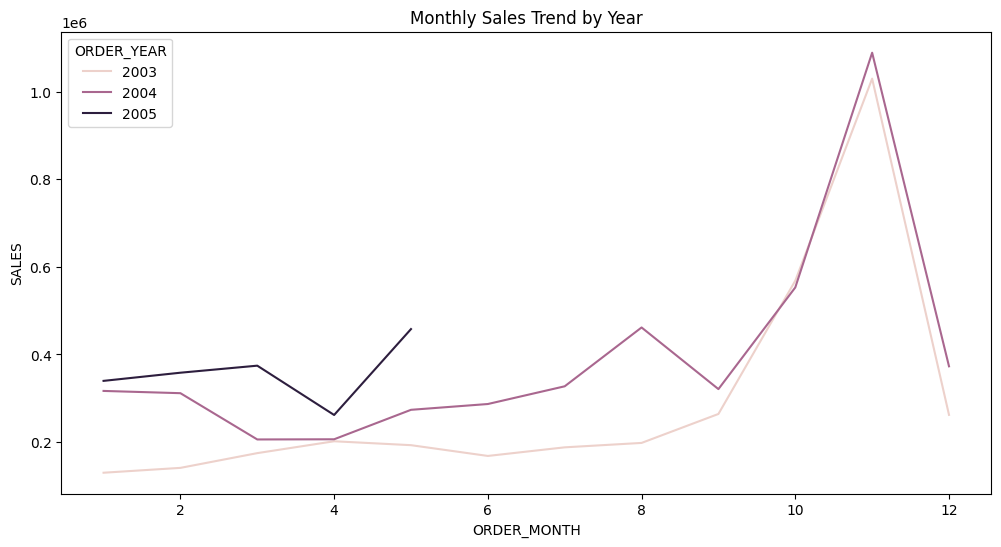

In [12]:
monthly_sales = df.groupby(['ORDER_YEAR', 'ORDER_MONTH'])['SALES'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='ORDER_MONTH', y='SALES', hue='ORDER_YEAR', data=monthly_sales)
plt.title('Monthly Sales Trend by Year')
plt.show()

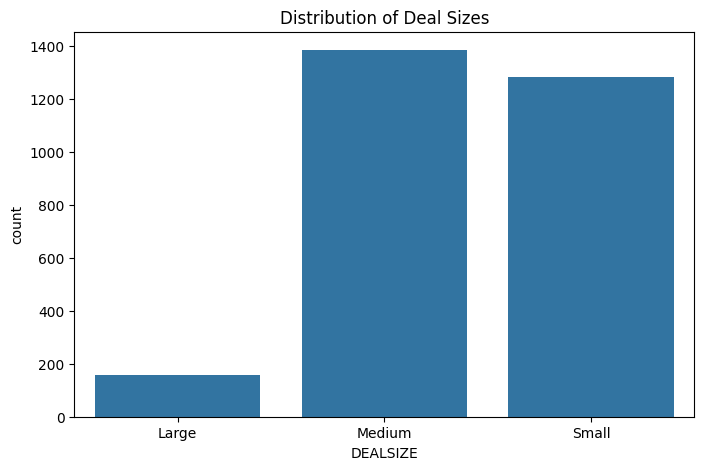

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='DEALSIZE', data=df)
plt.title('Distribution of Deal Sizes')
plt.show()

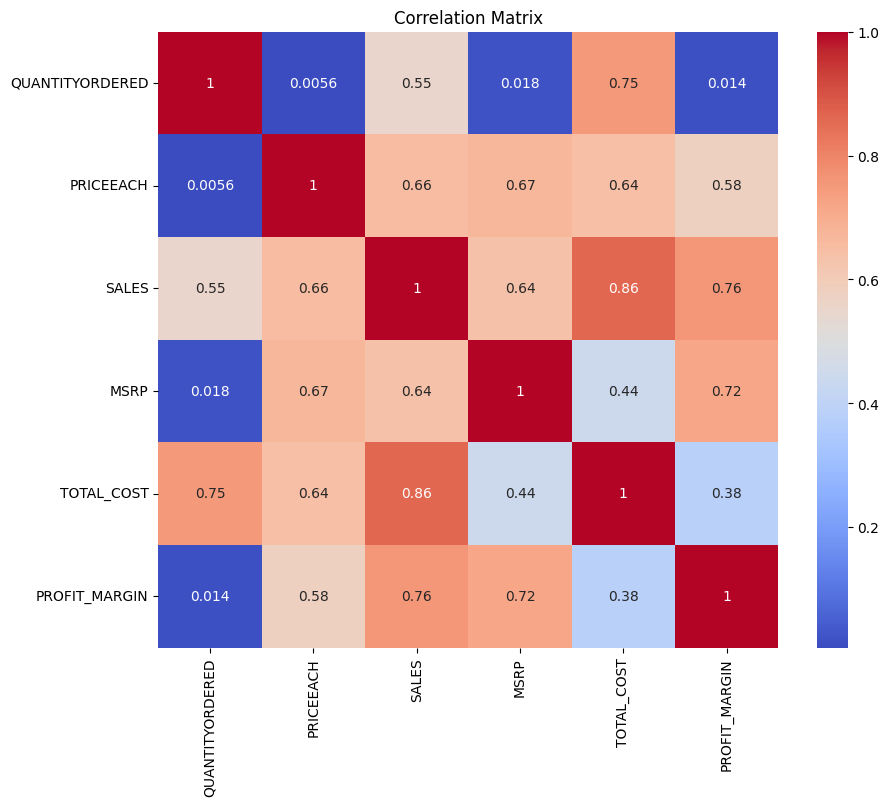

In [14]:
numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'TOTAL_COST', 'PROFIT_MARGIN']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

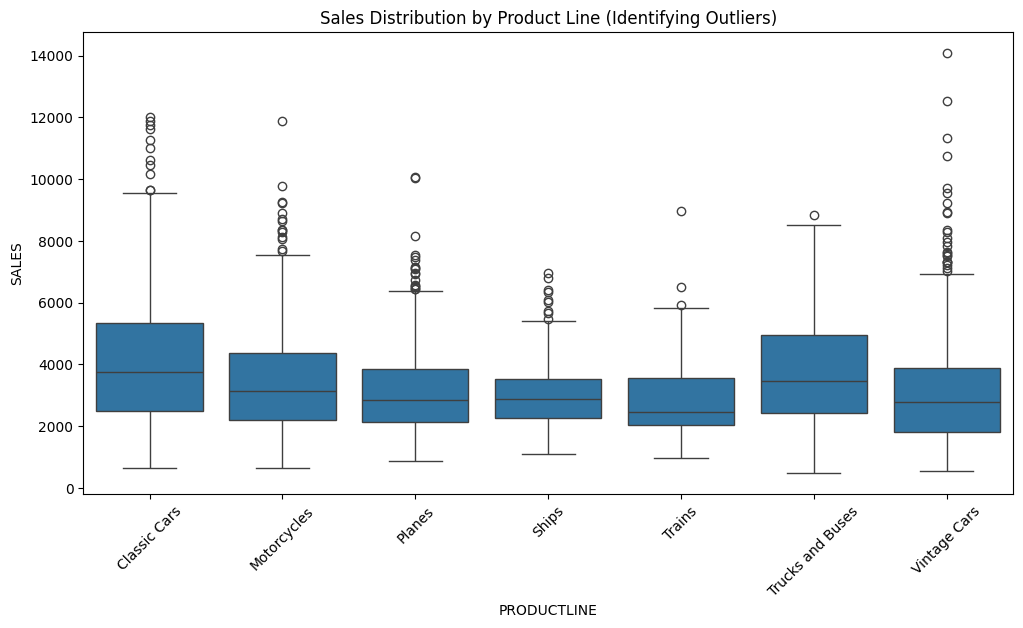

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)
plt.title('Sales Distribution by Product Line (Identifying Outliers)')
plt.xticks(rotation=45)
plt.show()


Capping extreme values at 99th percentile:
SALES: 9167.10
QUANTITYORDERED: 56.00


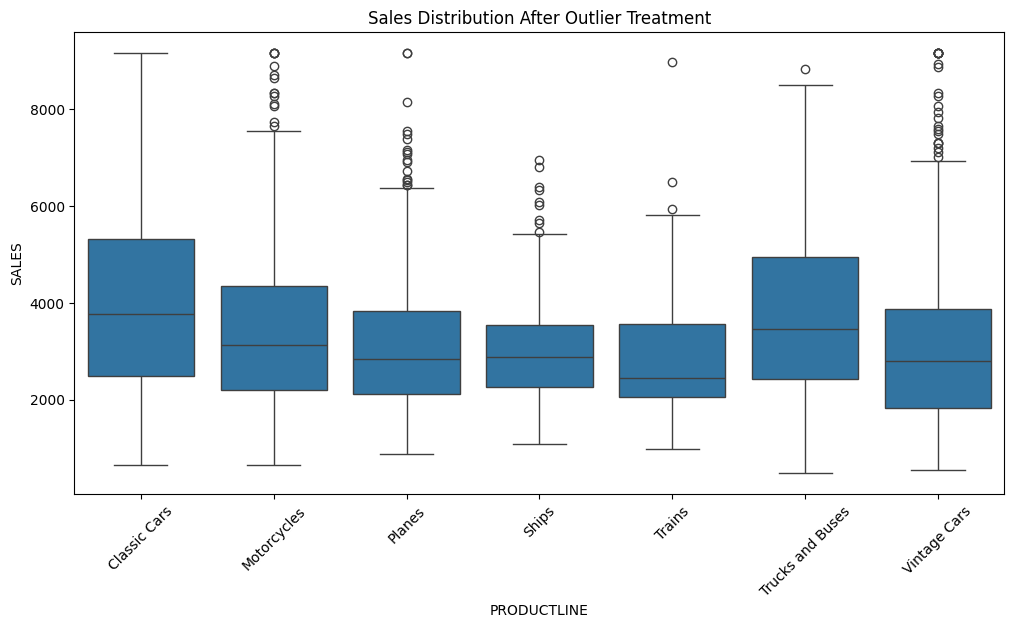

In [ ]:
print("\nCapping extreme values at 99th percentile:")
for col in ['SALES', 'QUANTITYORDERED']:
    upper_limit = df[col].quantile(0.99)
    print(f"{col}: {upper_limit:.2f}")
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])


plt.figure(figsize=(12, 6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)
plt.title('Sales Distribution After Outlier Treatment')
plt.xticks(rotation=45)
plt.show()

In [16]:
print("\nFinal data summary:")
print(f"Rows: {len(df)}")
print(f"Columns: {len(df.columns)}")
print("\nSample of processed data:")
print(df[['ORDERNUMBER', 'ORDERDATE', 'PRODUCTLINE', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'DEALSIZE']].head())


Final data summary:
Rows: 2823
Columns: 31

Sample of processed data:
   ORDERNUMBER  ORDERDATE  PRODUCTLINE  QUANTITYORDERED  PRICEEACH    SALES  \
0        10107 2003-02-24  Motorcycles               30      95.70  2871.00   
1        10121 2003-05-07  Motorcycles               34      81.35  2765.90   
2        10134 2003-07-01  Motorcycles               41      94.74  3884.34   
3        10145 2003-08-25  Motorcycles               45      83.26  3746.70   
4        10159 2003-10-10  Motorcycles               49     100.00  5205.27   

  DEALSIZE  
0    Small  
1    Small  
2   Medium  
3   Medium  
4   Medium  
